# Imports

In [1]:
import os
os.chdir('../../vlm_toolbox/')

/home/alireza/vlm_toolbox


In [2]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [3]:
import gc
import warnings

import pandas as pd
import torch
from matplotlib import pyplot as plt

from config.enums import ImageDatasets, PrecisionDtypes, Sources, Trainers
from config.setup import Setup
from metric.accuracy import AccuracyMetricEvaluator
from metric.visualization.accuracy import plot_model_accuracy
from pipeline.pipeline import Pipeline

In [ ]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"
warnings.filterwarnings('ignore')

In [ ]:
def flush():
    gc.collect()
    torch.cuda.empty_cache()

# Config

In [ ]:
setup = Setup(
    dataset_name=ImageDatasets.IMAGENET_1K,
    trainer_name=Trainers.CLIP,
    source=Sources.OPEN_AI,
    main_metric_name=AccuracyMetricEvaluator.get_main_metric_name(),
    precision_dtype=PrecisionDtypes.FP16,
    label_column_name='coarse',
    # annotations_key_value_criteria={'kingdom': ['Animalia']},
)
setup

### Device

In [ ]:
DEVICE_TYPE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE = torch.device(DEVICE_TYPE)
DEVICE

# Evaluation

In [ ]:
pipeline = Pipeline(setup, device_type=DEVICE_TYPE)

In [ ]:
pipeline.setup_data()

In [ ]:
pipeline.setup_model()

In [ ]:
pipeline.evaluate()

In [12]:
saved_dirs_dict = pipeline.save_metrics(main_metric_only=False)
print(saved_dirs_dict)

{'per_sample': '/home/alireza/io/experiments/eval_only/imagenet1k/clip_vit_b_16/open_ai/clip/coarse/per_sample.csv', 'per_class': '/home/alireza/io/experiments/eval_only/imagenet1k/clip_vit_b_16/open_ai/clip/coarse/per_class.csv', 'overall': '/home/alireza/io/experiments/eval_only/imagenet1k/clip_vit_b_16/open_ai/clip/coarse/overall.csv'}


In [13]:
main_metric_df = pd.read_csv(saved_dirs_dict['overall'])
main_metric_df

,accuracy,top_k,trainer_name
0,0.55546,1,clip
1,0.68356,2,clip
2,0.74496,3,clip
3,0.78446,4,clip
4,0.81360,5,clip


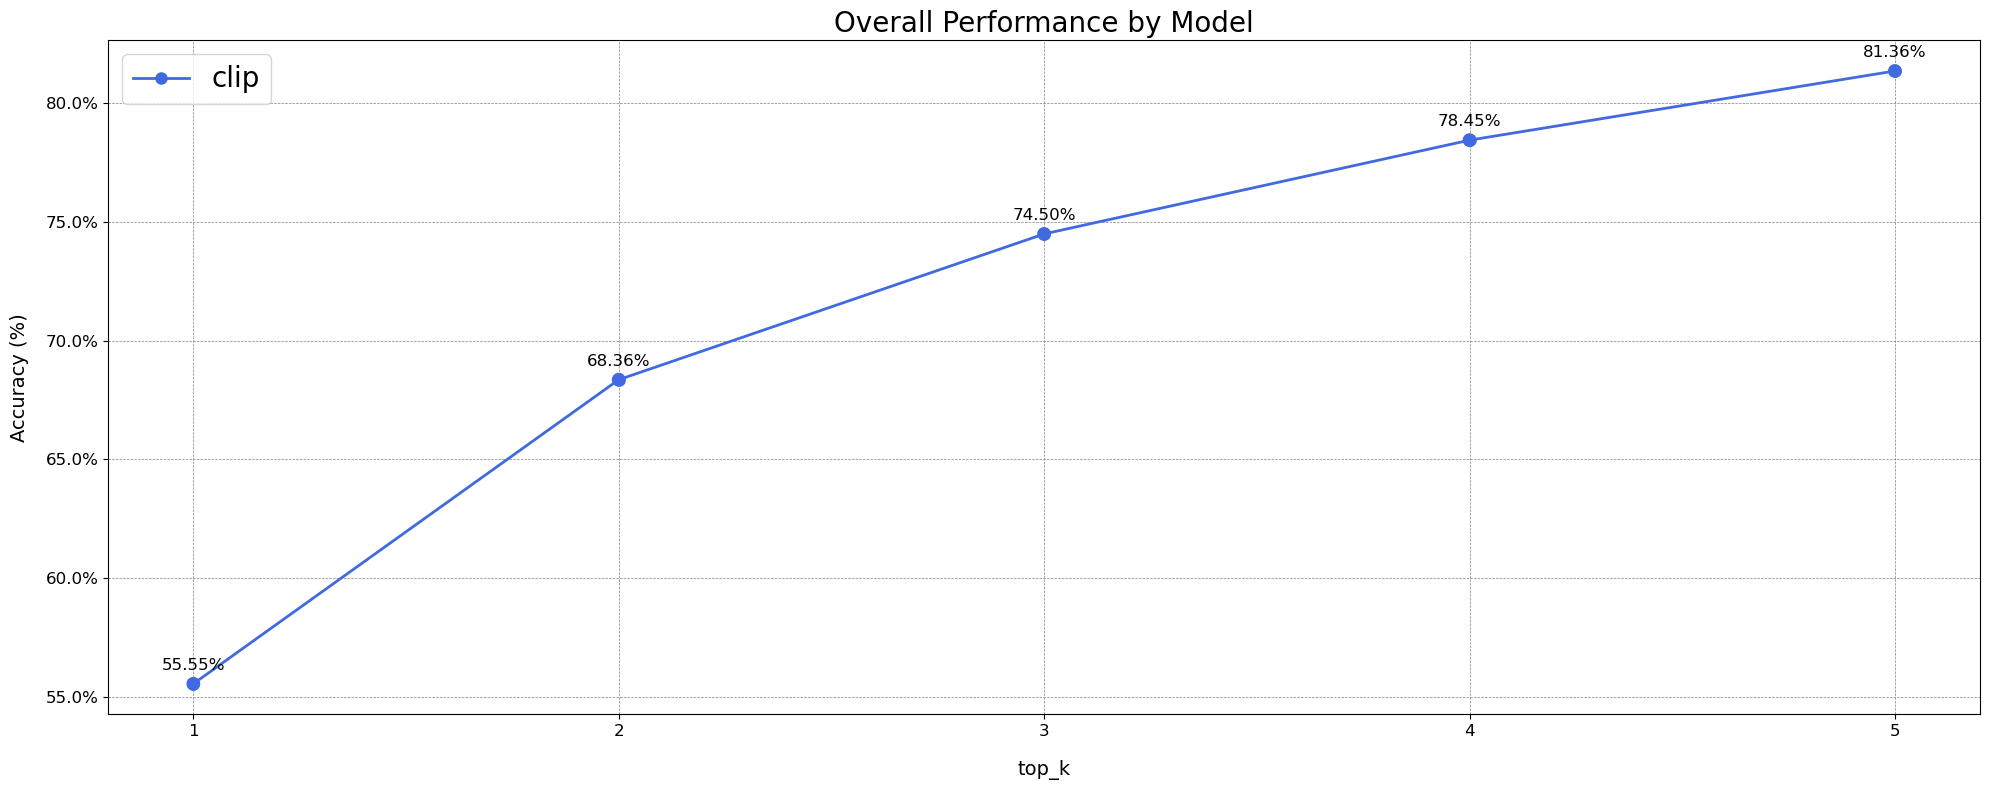

In [14]:
plot_model_accuracy(main_metric_df)
plt.show()